In [1]:
# To write a Python 2/3 compatible codebase, below line is added
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50) #increasing no columns to display 
pd.set_option('display.width', 120) #increasing panda output window width

df = pd.read_excel("default of credit card clients.xls",skiprows=1) # reading data from current directory
print(df.head()) # understanding the data by previewing a sample
print(df.shape) # no of rows and columns in data
print(df.describe(include='all'))  # simple statistics on each column in data
print(df.isnull().any()) # to chech if any column has missing values
print(df.nunique()) # no of unique values in each column

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0   1      20000    2          2         1   24      2      2     -1     -1     -2     -2       3913       3102   
1   2     120000    2          2         2   26     -1      2      0      0      0      2       2682       1725   
2   3      90000    2          2         2   34      0      0      0      0      0      0      29239      14027   
3   4      50000    2          2         1   37      0      0      0      0      0      0      46990      48233   
4   5      50000    1          2         1   57     -1      0     -1      0      0      0       8617       5670   

   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        689          0          0          0         0       689         0         0         0         0   
1       2682       3272       3455       3261         0      1000      1000      1000      

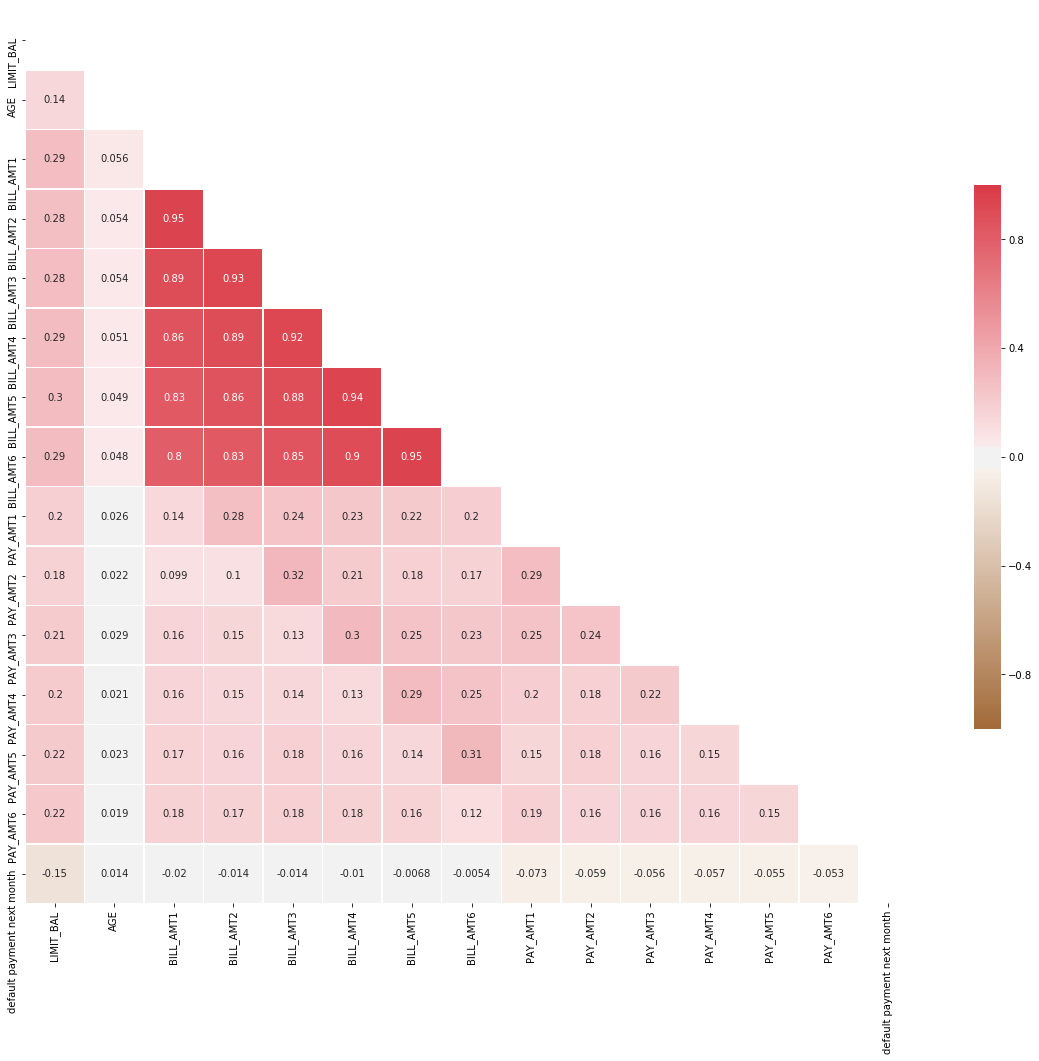

In [3]:
# Correlation analysis
import matplotlib.pyplot as plt
#pyplot is matplotlib's plotting framework

df2= df.copy()
df2.drop(df2.columns[[0,2,3,4,6,7,8,9,10,11]],axis=1, inplace = True)
corr = df2.corr()

# Seaborn is a Python data visualization library based on matplotlib. 
import seaborn as sns
#using a heatmap to visualize the correlation matrix
    
#Correlation heatmap 2
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(400, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

''

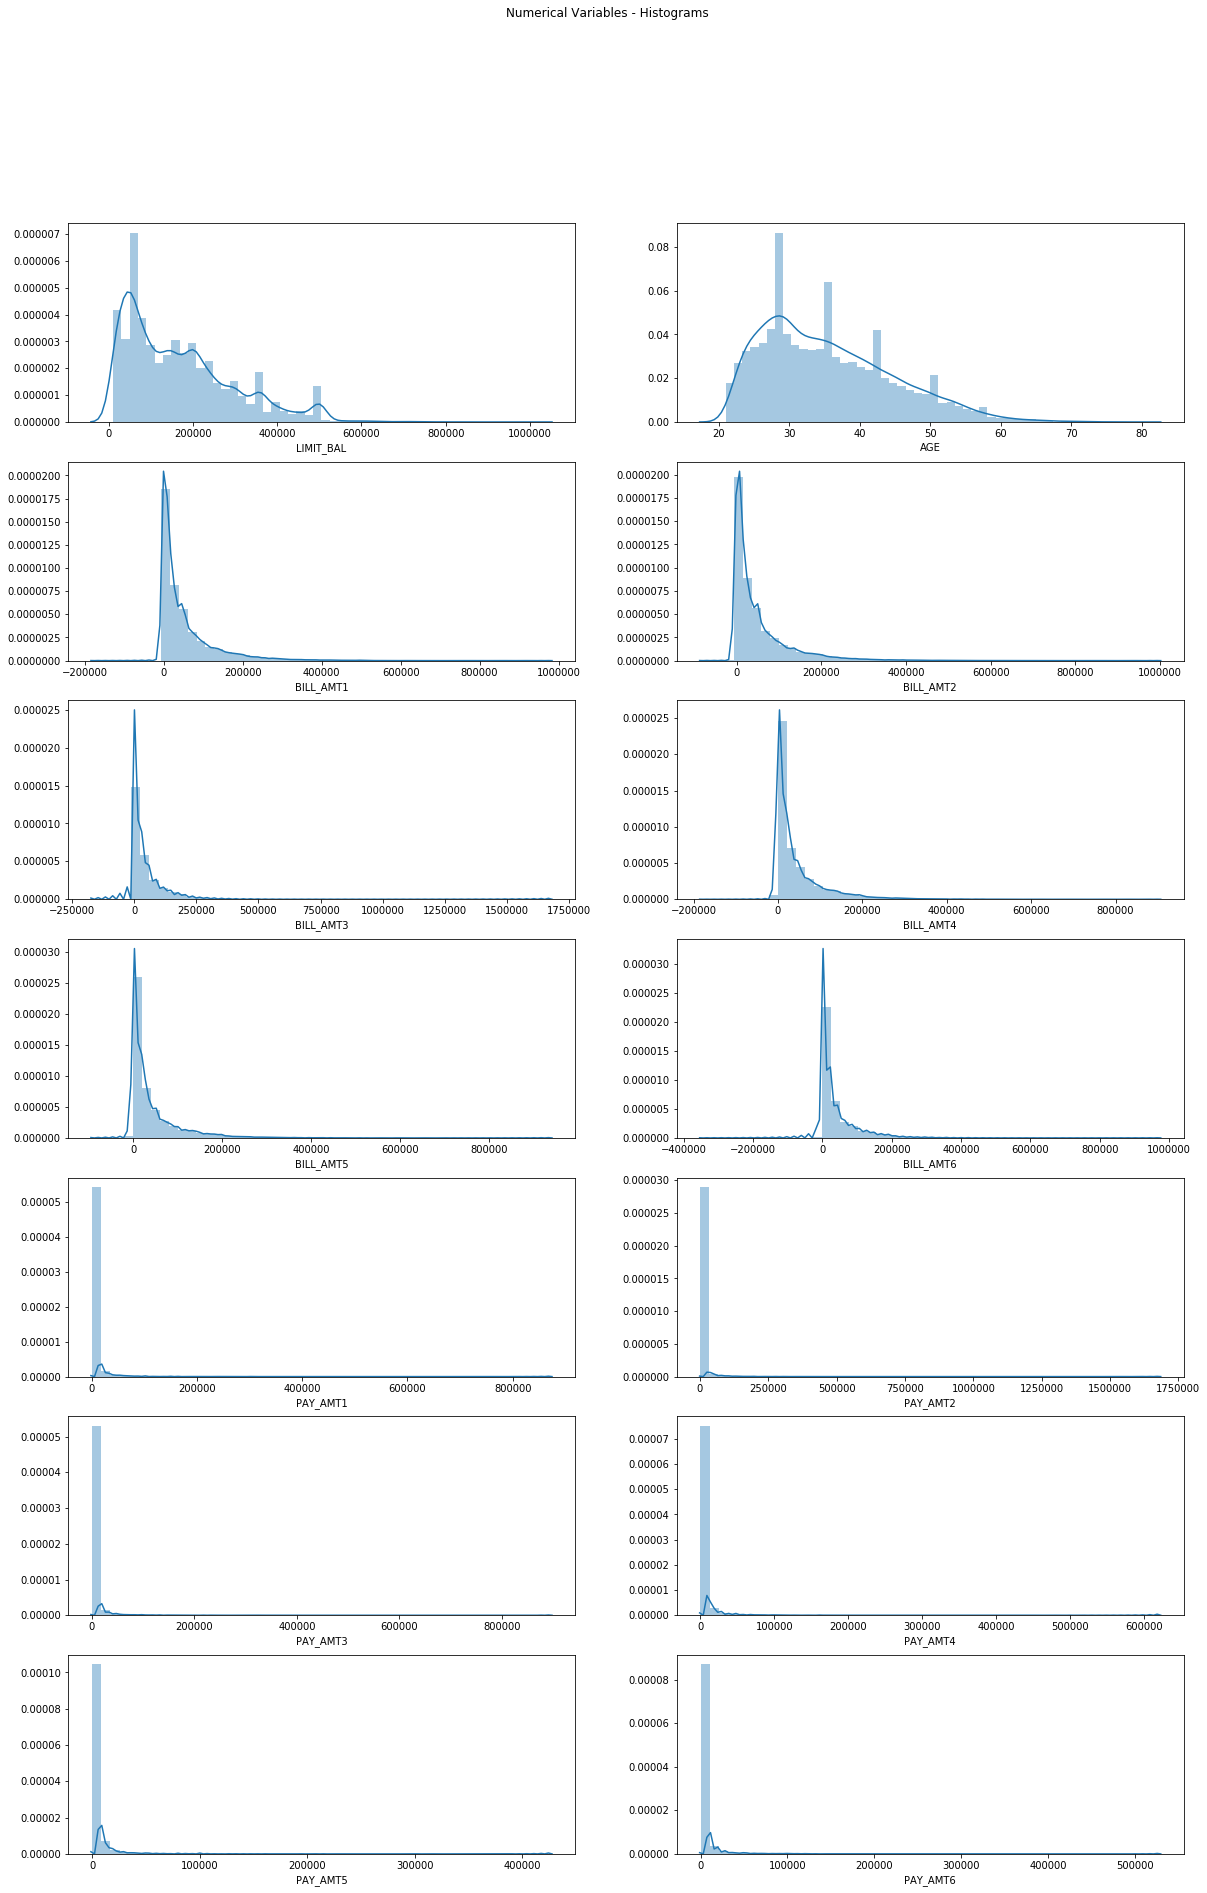

In [4]:
# Numerical Variable Distribution
f, axes = plt.subplots(7, 2, figsize=(20, 30), facecolor='white')
f.suptitle('Numerical Variables - Histograms')
ax1 = sns.distplot(df["LIMIT_BAL"], ax=axes[0,0])
ax2 = sns.distplot(df["AGE"],ax=axes[0,1])
ax3 = sns.distplot(df["BILL_AMT1"], ax=axes[1,0])
ax4 = sns.distplot(df["BILL_AMT2"],  ax=axes[1,1])
ax5 = sns.distplot(df["BILL_AMT3"],  ax=axes[2,0])
ax6 = sns.distplot(df["BILL_AMT4"],  ax=axes[2,1])
ax7 = sns.distplot(df["BILL_AMT5"],  ax=axes[3,0])
ax8 = sns.distplot(df["BILL_AMT6"],   ax=axes[3,1])
ax9 = sns.distplot(df["PAY_AMT1"],  ax=axes[4,0])
ax10 = sns.distplot(df["PAY_AMT2"], ax=axes[4,1])
ax11 = sns.distplot(df["PAY_AMT3"],   ax=axes[5,0])
ax12 = sns.distplot(df["PAY_AMT4"],   ax=axes[5,1])
ax13 = sns.distplot(df["PAY_AMT5"],  ax=axes[6,0])
ax14 = sns.distplot(df["PAY_AMT6"],  ax=axes[6,1])
;

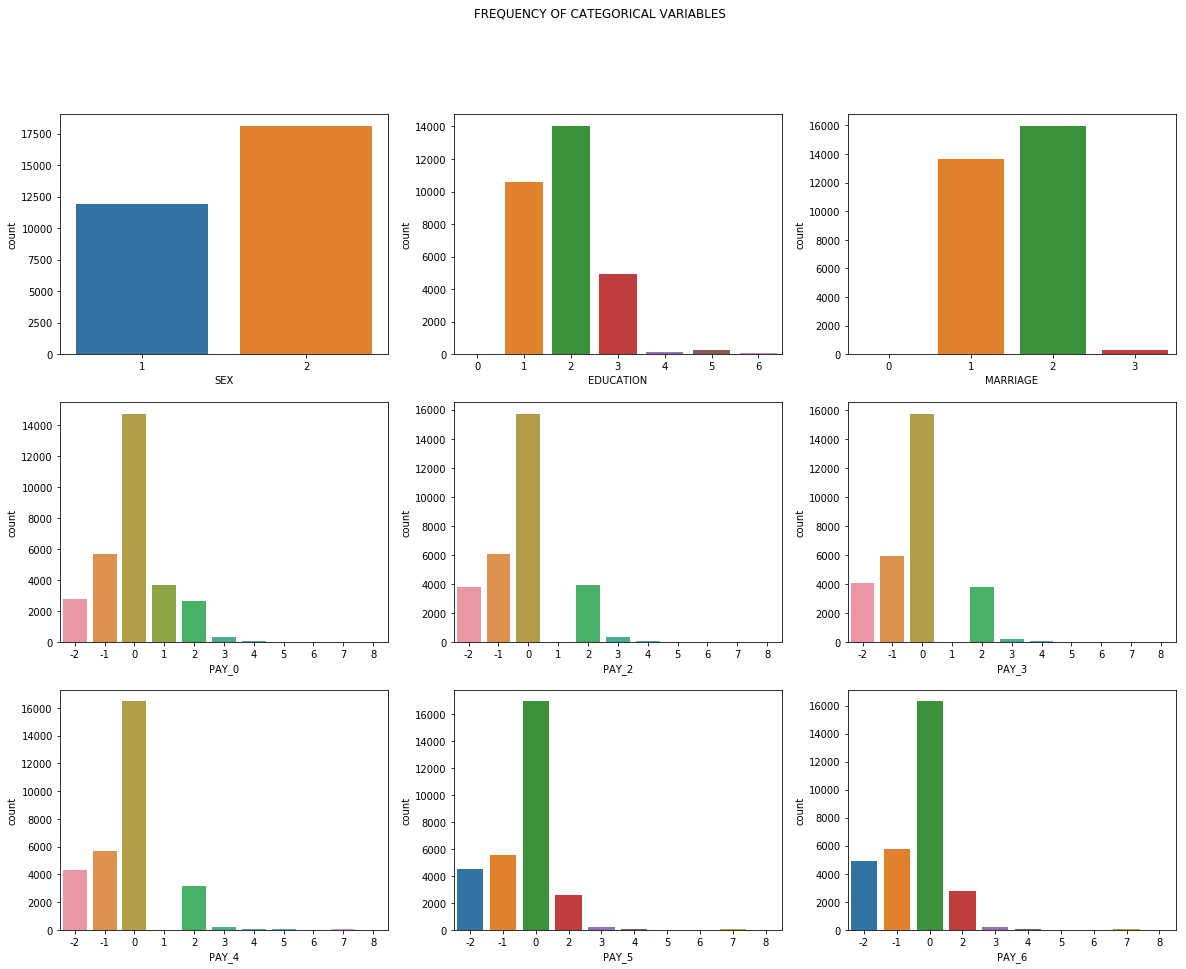

In [5]:
# Categorical Variable distibution
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES')
ax1 = sns.countplot(x="SEX",  data=df,  ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", data=df,ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE",data=df,ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", data=df, ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2",  data=df, ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", data=df, ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", data=df, ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5",  data=df, ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", data=df, ax=axes[2,2]);

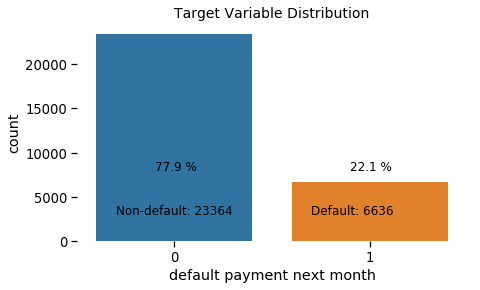

In [6]:
# The frequency of defaults
yes = sum(df["default payment next month"])
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default payment next month',data=df)
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Target Variable Distribution', size=14)
#Removing the frame
plt.box(False);

In [7]:
# Transformations

df2= df.copy()
df2["PAY_Ratio_May"]=  df2["PAY_AMT4"] /(df2["BILL_AMT5"] - (df2["BILL_AMT6"] - df2["PAY_AMT5"])) #April's bill is being paid in May so df2["BILL_AMT6"] - df2["PAY_AMT5"] = the balance being unpaid for Apirl's bill. May bill - April remaining balance is bill incured in May and that should be repayed in June.
df2["PAY_Ratio_June"] =  df2["PAY_AMT3"]/(df2["BILL_AMT4"] - (df2["BILL_AMT5"] - df2["PAY_AMT4"]))
df2["PAY_Ratio_July"] =  df2["PAY_AMT2"]/(df2["BILL_AMT3"]- (df2["BILL_AMT4"] - df2["PAY_AMT3"]))                  
df2["PAY_Ratio_August"] = df2["PAY_AMT1"]/(df2["BILL_AMT2"] - (df2["BILL_AMT3"] - df2["PAY_AMT2"]))

df2.loc[(df2.PAY_0 >=1) ,'PAY_0'] = 1
df2.loc[(df2.PAY_2 >=1) ,'PAY_2'] = 1
df2.loc[(df2.PAY_3 >=1),'PAY_3'] = 1
df2.loc[(df2.PAY_4 >=1),'PAY_4'] = 1
df2.loc[(df2.PAY_5 >=1),'PAY_5'] = 1
df2.loc[(df2.PAY_6 >=1),'PAY_6'] = 1
df2.loc[(df2.PAY_0 == 0) | (df2.PAY_0 == -1)|(df2.PAY_0 == -2),'PAY_0'] = 0
df2.loc[(df2.PAY_2 == 0) | (df2.PAY_2 == -1)|(df2.PAY_2 == -2),'PAY_2'] = 0
df2.loc[(df2.PAY_3 == 0) | (df2.PAY_3 == -1)|(df2.PAY_3 == -2),'PAY_3'] = 0
df2.loc[(df2.PAY_4 == 0) | (df2.PAY_4 == -1)|(df2.PAY_4 == -2),'PAY_4'] = 0
df2.loc[(df2.PAY_5 == 0) | (df2.PAY_5 == -1)|(df2.PAY_5 == -2),'PAY_5'] = 0
df2.loc[(df2.PAY_6 == 0) | (df2.PAY_6 == -1)|(df2.PAY_6 == -2),'PAY_6'] = 0

df2.loc[(df2.EDUCATION == 4) | (df2.EDUCATION == 5)|(df2.EDUCATION == 6),'EDUCATION'] = 4

df3 = df2.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',"BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis = 1)
df3[df3["PAY_Ratio_May"] > 100000] = 1
df3[df3["PAY_Ratio_June"] > 100000] = 1
df3[df3["PAY_Ratio_July"] > 100000] = 1
df3[df3["PAY_Ratio_August"] > 100000] = 1
df3 = df3.replace(np.NaN,1)
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,PAY_Ratio_May,PAY_Ratio_June,PAY_Ratio_July,PAY_Ratio_August
0,1,20000,2,2,1,24,1,1,0,0,0,0,1,1.000000,1.000000,1.000000,0.000000
1,2,120000,2,2,2,26,0,1,0,0,0,1,1,5.154639,1.223990,2.439024,0.000000
2,3,90000,2,2,2,34,0,0,0,0,0,0,0,2.506266,2.610966,6.578947,0.771341
3,4,50000,2,2,1,37,0,0,0,0,0,0,0,2.286902,2.637363,0.091040,2.081165
4,5,50000,1,2,1,57,0,0,0,0,0,0,0,12.784091,0.926441,1.473428,0.306937


In [45]:
from sklearn.model_selection import train_test_split
df3a= df3.copy()
df3a.drop(df3a.columns[[0,2,3,4,6,7,8,9,10,11]],axis=1, inplace = True)


df4= df3.copy()
df4['SEX'][df4['SEX'] == 2]=0
df_ed = pd.get_dummies(df4['EDUCATION'])
df_mr = pd.get_dummies(df4['MARRIAGE'])
df_p0 = pd.get_dummies(df4['PAY_0'])
df_p2 = pd.get_dummies(df4['PAY_2'])
df_p3 = pd.get_dummies(df4['PAY_3'])
df_p4 = pd.get_dummies(df4['PAY_4'])
df_p5 = pd.get_dummies(df4['PAY_5'])
df_p6 = pd.get_dummies(df4['PAY_6'])
SEX = df4["SEX"]
df_new = pd.concat([df3a, df_ed,df_mr,df_p0,df_p2,df_p3,df_p4,df_p5,df_p6,SEX], axis=1)
df_new.AGE = np.log(df_new.AGE)
df_new.LIMIT_BAL = np.log(df_new.LIMIT_BAL)
X= df_new.copy()
X.drop(X.columns[[2]],axis=1, inplace = True)# Features
y = df_new.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [47]:
from sklearn.utils import resample


##############UPSAMPLING
# concatenate our training data back together
train_ups = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_default = train_ups[train_ups['default payment next month']==0]
default = train_ups[train_ups['default payment next month']==1]

# upsample minority
fraud_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=12000, # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_default, fraud_upsampled])

# check new class counts
upsampled['default payment next month'].value_counts()

X_trainup = upsampled.iloc[:,:-1]# Features
y_trainup = upsampled.iloc[:,-1] # Target variable




##############DOWNSAMPLING
# upsample minority
fraud_downsampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=4000, # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([default, fraud_downsampled])

# check new class counts
downsampled['default payment next month'].value_counts()

X_traindown = downsampled.iloc[:,:-1]# Features
y_traindown = downsampled.iloc[:,-1] # Target variable


###SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio=0.8)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [49]:
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
#dtree with downsampled data 
np.random.seed(42) # Ensure reproducability
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dt = dt.fit(X_traindown, y_traindown)
#################################### Apply the dtree Model ####################################

y_pred = dt.predict(X_test)             # Classification prediction
y_pred_prob = dt.predict_proba(X_test)  # Class probabilities
y_pred_insample = dt.predict(X_traindown)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_traindown, y_pred_insample))

0 [0.73584906 0.26415094] 1.0
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      6712
           1       0.51      0.69      0.59      2288

   micro avg       0.76      0.76      0.76      9000
   macro avg       0.70      0.73      0.71      9000
weighted avg       0.79      0.76      0.77      9000

Accuracy (out-of-sample): 0.76
Accuracy (in-sample): 0.73


In [50]:
#dtree with upsampled data 
np.random.seed(42) # Ensure reproducability
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dt = dt.fit(X_trainup, y_trainup)
#################################### Apply the dtree Model ####################################

y_pred = dt.predict(X_test)             # Classification prediction
y_pred_prob = dt.predict_proba(X_test)  # Class probabilities
y_pred_insample = dt.predict(X_trainup)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_trainup, y_pred_insample))

0 [0.76317493 0.23682507] 1.0
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6712
           1       0.62      0.55      0.59      2288

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.74      0.72      0.73      9000
weighted avg       0.79      0.80      0.80      9000

Accuracy (out-of-sample): 0.80
Accuracy (in-sample): 0.75


In [51]:
#dtree with smote data 
np.random.seed(42) # Ensure reproducability
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dt = dt.fit(X_train_sm, y_train_sm)
#################################### Apply the dtree Model ####################################

y_pred = dt.predict(X_test)             # Classification prediction
y_pred_prob = dt.predict_proba(X_test)  # Class probabilities
y_pred_insample = dt.predict(X_train_sm)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train_sm, y_pred_insample))

0 [0.76887135 0.23112865] 1.0
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6712
           1       0.58      0.61      0.59      2288

   micro avg       0.79      0.79      0.79      9000
   macro avg       0.72      0.73      0.73      9000
weighted avg       0.79      0.79      0.79      9000

Accuracy (out-of-sample): 0.79
Accuracy (in-sample): 0.76


In [52]:
# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.linear_model import LogisticRegression 

import sys ,warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
    from sklearn import linear_model 
clf = linear_model.LogisticRegression(C=10000)

clf = clf.fit(X_traindown, y_traindown)
print('The weights of the attributes are:', clf.coef_)
#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_traindown)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_traindown, y_pred_insample))

The weights of the attributes are: [[-2.63826241e-01 -9.04328339e-02  1.51836176e-03  7.10479607e-03
   2.24192743e-04  7.46195806e-03 -3.96202114e+00  1.40123831e+00
   1.42984639e+00  1.52266583e+00  3.11740003e-01  6.48127876e-01
   9.46134948e-02 -1.36234358e-01  9.69623798e-02 -3.05630489e-01
   1.00909988e+00  2.44262704e-01  4.59206688e-01  1.50415472e-01
   5.53053920e-01  1.61478320e-01  5.41991073e-01  2.22747013e-01
   4.80722380e-01  1.83134814e-01  5.20334578e-01  1.22615198e-01]]
0 [0.72959311 0.27040689] 1.0
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6712
           1       0.53      0.68      0.60      2288

   micro avg       0.76      0.76      0.76      9000
   macro avg       0.70      0.74      0.71      9000
weighted avg       0.79      0.76      0.77      9000

Accuracy (out-of-sample): 0.76
Accuracy (in-sample): 0.73


In [53]:
#logistic reg on UP sampled data
import sys ,warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn import linear_model 
clf = linear_model.LogisticRegression(C=10000,penalty="l1")

clf = clf.fit(X_trainup, y_trainup)
print('The weights of the attributes are:', clf.coef_)
#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_trainup)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_trainup, y_pred_insample))

The weights of the attributes are: [[-2.76406694e-01  4.47128762e-02 -4.06341861e-04  7.92182525e-04
   6.17994856e-04  6.21183617e-03 -1.00384362e+01  4.94797868e-01
   4.48660474e-01  4.38909069e-01 -5.14390239e-01 -1.38450716e-01
   5.13732174e-01  2.42575079e-01  3.21291955e-01 -1.66963708e-01
   1.18316125e+00  6.37151201e-01  9.37615665e-01  2.47074714e-01
   5.65336510e-01 -2.38598493e-01  1.12198849e-01  4.25996073e-01
   7.02256800e-01  2.79976527e-01  6.12433759e-01  1.23617307e-01]]
0 [0.82060065 0.17939935] 1.0
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6712
           1       0.61      0.61      0.61      2288

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.74      0.74      0.74      9000
weighted avg       0.80      0.80      0.80      9000

Accuracy (out-of-sample): 0.80
Accuracy (in-sample): 0.75


In [54]:
#logistic reg on SMOTE data
import sys ,warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn import linear_model 
clf = linear_model.LogisticRegression(C=10000,penalty="l1")

clf = clf.fit(X_train_sm, y_train_sm)
print('The weights of the attributes are:', clf.coef_)
#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_train_sm)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train_sm, y_pred_insample))

The weights of the attributes are: [[-2.71138312e-01 -3.82933632e-02 -2.99032492e-03 -1.08607824e-03
  -8.20834744e-04  4.04433559e-03 -1.03993476e+01  1.55444478e-01
   1.86315063e-01  1.32751189e-01 -1.06559600e+00 -7.63324475e-01
   2.35492546e-01 -4.69948107e-03 -9.61590770e-02  2.04850912e-01
   1.55361106e+00  1.34807142e-01  4.71527665e-01  3.26171579e-01
   5.88089522e-01  4.69124734e-01  7.62762756e-01  1.43001659e-01
   3.30261273e-01  1.31956116e-01  5.18880546e-01  1.17702581e-01]]
0 [0.81314067 0.18685933] 1.0
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6712
           1       0.60      0.61      0.61      2288

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.73      0.74      0.74      9000
weighted avg       0.80      0.80      0.80      9000

Accuracy (out-of-sample): 0.80
Accuracy (in-sample): 0.74


In [55]:
#knn on down sampled data

################################### kNN Parameter Tuning ###################################
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
#Normalize Data
sc = StandardScaler()
#sc.fit(X_train)
sc.fit(pd.concat([X_test,X_traindown]))
X_train_std = sc.transform(X_traindown)
X_test_std = sc.transform(X_test)


# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski',weights='distance') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train_std, y_traindown) 

############################################# Evaluate the Model #############################################

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_traindown, y_pred_insample))

# F1 score
##print('F1 score M (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
#print('F1 score M (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))
##print('F1 score B (out-of-sample): ', f1_score(y_test, y_pred,pos_label='B'))

# Precision 
##print('Precision M: ', precision_score(y_test, y_pred,pos_label='M'))
##print('Recall M   : ', recall_score(y_test, y_pred,pos_label='M'))
##print('Precision B: ', precision_score(y_test, y_pred,pos_label='B'))
##print('Recall B  : ', recall_score(y_test, y_pred,pos_label='B'))


# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

Accuracy (out-of-sample): 0.64
Accuracy (in-sample): 1.00
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      6712
           1       0.39      0.72      0.50      2288

   micro avg       0.64      0.64      0.64      9000
   macro avg       0.63      0.67      0.61      9000
weighted avg       0.74      0.64      0.67      9000



In [56]:
#knn on UP sampled data

################################### kNN Parameter Tuning ###################################
# Standardize features by removing the mean and scaling to unit variance
#Normalize Data
sc = StandardScaler()
sc.fit(pd.concat([X_test, X_trainup]))
X_train_std = sc.transform(X_trainup)
X_test_std = sc.transform(X_test)


# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski',weights='distance') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train_std, y_trainup) 

############################################# Evaluate the Model #############################################

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_trainup, y_pred_insample))

# F1 score
##print('F1 score M (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
#print('F1 score M (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))
##print('F1 score B (out-of-sample): ', f1_score(y_test, y_pred,pos_label='B'))

# Precision 
##print('Precision M: ', precision_score(y_test, y_pred,pos_label='M'))
##print('Recall M   : ', recall_score(y_test, y_pred,pos_label='M'))
##print('Precision B: ', precision_score(y_test, y_pred,pos_label='B'))
##print('Recall B  : ', recall_score(y_test, y_pred,pos_label='B'))


# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

Accuracy (out-of-sample): 0.72
Accuracy (in-sample): 1.00
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6712
           1       0.46      0.59      0.52      2288

   micro avg       0.72      0.72      0.72      9000
   macro avg       0.65      0.68      0.66      9000
weighted avg       0.75      0.72      0.73      9000



In [57]:
#knn on SMOTE data

################################### kNN Parameter Tuning ###################################
# Standardize features by removing the mean and scaling to unit variance
#Normalize Data
sc = StandardScaler()
X_train_sm_ = pd.DataFrame(data=X_train_sm,columns=X_test.columns)
sc.fit(pd.concat([X_test, X_train_sm_]))
X_train_std = sc.transform(X_train_sm_)
X_test_std = sc.transform(X_test)


# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski',weights='distance') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train_std, y_train_sm) 

############################################# Evaluate the Model #############################################

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train_sm, y_pred_insample))

# F1 score
##print('F1 score M (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
#print('F1 score M (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))
##print('F1 score B (out-of-sample): ', f1_score(y_test, y_pred,pos_label='B'))

# Precision 
##print('Precision M: ', precision_score(y_test, y_pred,pos_label='M'))
##print('Recall M   : ', recall_score(y_test, y_pred,pos_label='M'))
##print('Precision B: ', precision_score(y_test, y_pred,pos_label='B'))
##print('Recall B  : ', recall_score(y_test, y_pred,pos_label='B'))


# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

Accuracy (out-of-sample): 0.74
Accuracy (in-sample): 1.00
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      6712
           1       0.49      0.55      0.52      2288

   micro avg       0.74      0.74      0.74      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.75      0.74      0.74      9000



In [46]:
df_new.head()

,LIMIT_BAL,AGE,default payment next month,PAY_Ratio_May,PAY_Ratio_June,PAY_Ratio_July,PAY_Ratio_August,0,1,2,3,4,0,1,2,3,0,1,0,1,0,1,0,1,0,1,0,1,SEX
0,9.903488,3.178054,1,1.000000,1.000000,1.000000,0.000000,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0
1,11.695247,3.258097,1,5.154639,1.223990,2.439024,0.000000,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0
2,11.407565,3.526361,0,2.506266,2.610966,6.578947,0.771341,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
3,10.819778,3.610918,0,2.286902,2.637363,0.091040,2.081165,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0
4,10.819778,4.043051,0,12.784091,0.926441,1.473428,0.306937,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
